# Basics

In [1]:
# importing OpenCv
import cv2

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

In [2]:
# we define a helper function to print the image using `matplotlib`

# this prints colored image
def print_image(img, isGray=False, title="Image"):
    # OpenCV reads images in BGR, and matplotlib reads images in RGB
    # so, we switch the color channels using `cvtColor` method
    
    # if isGray = True, we first grayscale the image using the same `cvtColor` method
    if isGray:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_colored = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
    else:
        img_colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10,6))
    plt.imshow(img_colored)
    plt.axis(False)
    plt.title(title)
    plt.show()


# 1. Reading

In [3]:
# Reading an image
img = cv2.imread('./data/Photos/cat.jpg')
# 'img':: cv::Mat object

# Showing the image in a pop-up window
cv2.imshow('Cats', img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

1   HIToolbox                           0x00000001ae2d05c8 _ZN15MenuBarInstance22EnsureAutoShowObserverEv + 120
2   HIToolbox                           0x00000001ae2d0188 _ZN15MenuBarInstance14EnableAutoShowEv + 60
3   HIToolbox                           0x00000001ae273310 SetMenuBarObscured + 372
4   HIToolbox                           0x00000001ae272ee8 _ZN13HIApplication15HandleActivatedEP14OpaqueEventRefhP15OpaqueWindowPtrh + 172
5   HIToolbox                           0x00000001ae26cfcc _ZN13HIApplication13EventObserverEjP14OpaqueEventRefPv + 296
6   HIToolbox                           0x00000001ae233cd0 _NotifyEventLoopObservers + 176
7   HIToolbox                           0x00000001ae26c96c AcquireEventFromQueue + 432
8   HIToolbox                           0x00000001ae25bc84 ReceiveNextEventCommon + 320
9   HIToolbox                           0x00000001ae25bb2c _BlockUntilNextEventMatchingListInModeWithFilter + 72
10  AppKit                              0x00000001a7e08424 _DPS

<function destroyAllWindows>

Large images windows might not fit the screen. We will need to resize and rescale the image to view it with the appropriate sizing.

In [3]:
# to access webcam/device feed, use-
# cap = cv2.VideoCapture(0)

# Reading an existing video
cap = cv2.VideoCapture('./data/Videos/dog.mp4')

while True:
    # read the video frame by frame
    isTrue, frame = cap.read()
    
    # if cv.waitKey(20) & 0xFF==ord('q'):
    # This is the preferred way - if `isTrue` is false (the frame could not be read,
    # or we're at the end of the video), we immediately break from the loop. 
    if isTrue:    
        # show the video frame by frame
        cv2.imshow('Video', frame)
        if cv2.waitKey(20) & 0xFF==ord('q'):
            # exit condition: if we press 'q' we immediately quit
            break
    else:
        break

# releasing the capture
cap.release()
cv2.destroyAllWindows()

# 2. Resizing and Rescaling

In [3]:
# this works for images, videos and live videos
# we write a function to resize and rescale a image/frame
def rescaleFrame(frame, scale=0.5):
    # frame.shape = (height, width)
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)

    new_dimensions = (height, width)
    return cv2.resize(frame, new_dimensions, interpolation=cv2.INTER_AREA)
    # interpolation:  interpolation methods, useful when we are shrinking/enlarging the image to retain the quality
    # interpolation = cv2.INTER_AREA: useful while shrinking the image
    # interpolation = cv2.INTER_LINEAR: useful while enlarging the image
    # interpolation = cv2.INTER_CUBIC: slow but useful while enlarging the image while retaining the quality

In [6]:
# Resizing an image

img = cv2.imread('./data/Photos/cat_large.jpg')
# 'img':: cv::Mat object

# Showing the resized image
img_resized = rescaleFrame(img)

cv2.imshow('Cats_Large', img)
cv2.imshow('Cats_Large Resized', img_resized)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

Similarly, we can resize and rescale individual frames in a video and live video.

But for live videos, we have extra functionality of changing the resolution of the video.

In [2]:
# this method works only for live videos (won't work for stand alone video files)
# to access webcam/device feed, use-
cap = cv2.VideoCapture(0)

# change the resolution of the live feed to 480p = 480,640
height,width = 480,640
cap.set(3,width) # index 3 stands for width
cap.set(4,height) # index 4 stands for height

while True:
    # read the video frame by frame
    isTrue, frame = cap.read()
    
    # if cv.waitKey(20) & 0xFF==ord('q'):
    # This is the preferred way - if `isTrue` is false (the frame could not be read,
    # or we're at the end of the video), we immediately break from the loop. 
    if isTrue:
        # show the video frame by frame
        cv2.imshow('Video', frame)
        if cv2.waitKey(20) & 0xFF==ord('q'):
            # exit condition: if we press 'q' we immediately quit
            break
    else:
        break

# releasing the capture
cap.release()
cv2.destroyAllWindows()

# 3. Drawing Shapes and Putting Text

We can draw shapes on images in 2 ways:
- We can draw on stand alone images.
- We can create a blank image and draw on it.

## 3.1 Blank Images

In [2]:
# Blank Image

# creating a blank image
img_dimensions = (480,640,3)
blank_img = np.zeros(img_dimensions, dtype='uint8')
# this creates a completely dark blank image

cv2.imshow('My_Frame', blank_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

Suppose we want to paint the entire image blue/green/red. OpenCV uses the BGR format to read/write images.

In [5]:
# Blank Blue Image

# creating a blank image
img_dimensions = (480,640,3)
blank_img = np.zeros(img_dimensions, dtype='uint8')
# this creates a completely dark blank image
print("Shape of the image:", blank_img.shape)

# transform the color of the blank image to blue entirely
# by setting each pixel value to blue
blank_img[:] = (255,0,0)

cv2.imshow('My_Frame', blank_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

Shape of the image: (480, 640, 3)


<function destroyAllWindows>

In [33]:
# Blank Green Image

# creating a blank image
img_dimensions = (480,640,3)
blank_img = np.zeros(img_dimensions, dtype='uint8')
# this creates a completely dark blank image
print("Shape of the image:", blank_img.shape)

# transform the color of the blank image to green entirely
# by setting each pixel value to green
blank_img[:] = (0,255,0)

cv2.imshow('My_Frame', blank_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

Shape of the image: (480, 640, 3)


<function destroyAllWindows>

In [32]:
# Blank Red Image

# creating a blank image
img_dimensions = (480,640,3)
blank_img = np.zeros(img_dimensions, dtype='uint8')
# this creates a completely dark blank image
print("Shape of the image:", blank_img.shape)

# transform the color of the blank image to red entirely
# by setting each pixel value to red
blank_img[:] = (0,0,255)

cv2.imshow('My_Frame', blank_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

Shape of the image: (480, 640, 3)


<function destroyAllWindows>

## 3.2 Drawing Rectangles

- We can draw **rectangles** using: `cv2.rectangle(img, pt1, pt2, color, thickness)`.

In [12]:
# draw a rectangle using cv2.rectangle() method
# we draw a red rectangle on a green blank background

# creating a blank image
img_dimensions = (480,640,3)
blank_img = np.zeros(img_dimensions, dtype='uint8')
# this creates a completely dark blank image
print("Shape of the image:", blank_img.shape)

# transform the color of the blank image to green entirely
# by setting each pixel value to green
blank_img[:] = (0,255,0)

# draw a red rectangle
cv2.rectangle(blank_img, (160,160), (480, 320), (0,0,256), thickness=2)
# rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
# pt1, pt2 are the diagonal coordinates of the rectangle
# x-axis: width, y-axis: height
# NOTE: Origin of the coordinate system starts from top left corner

cv2.imshow('My_Frame', blank_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

Shape of the image: (480, 640, 3)


<function destroyAllWindows>

In [13]:
# draw a filled rectangle using cv2.rectangle() method
# we draw a red rectangle on a green blank background

# creating a blank image
img_dimensions = (480,640,3)
blank_img = np.zeros(img_dimensions, dtype='uint8')
# this creates a completely dark blank image
print("Shape of the image:", blank_img.shape)

# transform the color of the blank image to green entirely
# by setting each pixel value to green
blank_img[:] = (0,255,0)

# draw a red filled rectangle
cv2.rectangle(blank_img, (160,160), (480, 320), (0,0,256), thickness=cv2.FILLED)
# thickness = -1 (also gives a filled image)
# rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img
# pt1, pt2 are the diagonal coordinates of the rectangle
# x-axis: width, y-axis: height
# NOTE: Origin of the coordinate system starts from top left corner

cv2.imshow('My_Frame', blank_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

Shape of the image: (480, 640, 3)


<function destroyAllWindows>

## 3.3 Drawing Other Shapes

- We can draw **circles** using: `cv2.circle(img, center, radius, color, thickness)`.
- We can draw **lines** using: `cv2.line(img, pt1, pt2, color, thickness)`

## 3.4 Writing Text

- We can draw **lines** using: `cv2.putText(img, text, origin_pt, fontFace, fontScale, color, thickness)`

In [21]:
# draw a rectangle using cv2.rectangle() method
# we draw a red rectangle on a green blank background

# creating a blank image
img_dimensions = (480,640,3)
blank_img = np.zeros(img_dimensions, dtype='uint8')
# this creates a completely dark blank image
print("Shape of the image:", blank_img.shape)

# transform the color of the blank image to green entirely
# by setting each pixel value to green
blank_img[:] = (0,255,0)

# put a red text
cv2.putText(blank_img, text="Random Text!", org=(160,160), fontFace=cv2.FONT_HERSHEY_PLAIN, fontScale=3, color=(0,0,256), thickness=1)

cv2.imshow('My_Frame', blank_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

Shape of the image: (480, 640, 3)


<function destroyAllWindows>

# 4. Essential functions in OpenCV

## 4.1 Converting an Image to Greyscale

In [22]:
# Reading an image
img = cv2.imread('./data/Photos/cat.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# coverting the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Showing the image in a pop-up window
cv2.imshow('My_Frame', gray_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## 4.2 Gaussian Blurring

In [25]:
# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# coverting the image to blurred image using Gaussian Blur
blur_img = cv2.GaussianBlur(img, (3,3), cv2.BORDER_DEFAULT)
# ksize= Gaussian Kernel Size, increase blurring by increasing kernel/filter size
# this is similar to convolutions
# borderType = pixel extrapolation method

# Showing the image in a pop-up window
cv2.imshow('My_Frame', blur_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## 4.3 Edge Cascade (Edge Detection)

Edge detection is a technique of image processing used to identify points in a digital image with discontinuities, simply to say, sharp changes in the image brightness. These points where the image brightness varies sharply are called the edges (or boundaries) of the image.

In [26]:
# we try to find the edges that are present in the image
# In this example we use the: "Canny Edge Detector"

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# Edge Detection using: Canny Edge Detector
canny_edge_img = cv2.Canny(img, 125, 175)
# The function finds edges in the input image and marks them in the output map edges using the Canny algorithm.
# The smallest value between threshold1 and threshold2 is used for edge linking. 
# The largest value is used to find initial segments of strong edges.

# Showing the image in a pop-up window
cv2.imshow('My_Frame', canny_edge_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

We can reduce the edges detected in an image by passing the blurred transformed version of the image through the canny edge detector.

In [30]:
# we try to find the edges that are present in the gaussian blurred image
# In this example we use the: "Canny Edge Detector"

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# coverting the image to blurred image using Gaussian Blur
blur_img = cv2.GaussianBlur(img, (3,3), cv2.BORDER_DEFAULT)
# ksize= Gaussian Kernel Size, increase blurring by increasing kernel size
# borderType = pixel extrapolation method

# Edge Detection using: Canny Edge Detector
canny_edge_img = cv2.Canny(blur_img, 125, 175)
# The function finds edges in the input image and marks them in the output map edges using the Canny algorithm.
# The smallest value between threshold1 and threshold2 is used for edge linking.
# The largest value is used to find initial segments of strong edges.

# Showing the image in a pop-up window
cv2.imshow('My_Frame', canny_edge_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## 4.4 Thresholding

### 4.4.1 Simple Thresholding

For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function `cv2.threshold` is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function. Basic thresholding as described above is done by using the type `cv2.THRESH_BINARY`.

Source: [link](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

In [2]:
# First we, try out simple binary thresholding on this:

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# first, we grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# binary thresholding the grayscaled image using `cv2.threshold` method
ret, threshold_img = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
# we do simple thresholding by using `cv2.THRESH_BINARY`: for every pixel, the same threshold value is applied; if the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value
# in this case, we set every pixel with intensity < 125 to 0

# Showing the image in a pop-up window
cv2.imshow('My_Frame', threshold_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

In [3]:
# Now we, try out simple binary inverse thresholding on this: this reverses the blacks and whites (intensities) from prev

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# first, we grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# binary thresholding the grayscaled image using `cv2.threshold` method
ret, threshold_img = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY_INV)
# we do simple inverse thresholding by using `cv2.THRESH_BINARY_INV`: for every pixel, the same threshold value is applied; if the pixel value is smaller than the threshold, it is set to maximum, otherwise it is set to 0
# in this case, we set every pixel with intensity < 125 to max and >=125 to zero
# the black and whites reverses from cv2.THRESH_BINARY to cv2.THRESH_BINARY_INV

# Showing the image in a pop-up window
cv2.imshow('My_Frame', threshold_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

### 4.4.2 Adaptive Thresholding

In Simple Thresholding, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

In addition to the parameters in Simple THresholding, `cv2.adaptiveThreshold` takes in three input parameters:
- `adaptiveMethod`:
    - `cv2.ADAPTIVE_THRESH_MEAN_C`: The threshold value is the mean of the neighbourhood area minus the constant C.
    - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
- `blockSize`: determines the size of the neighbourhood area
- `C`: is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels

In [4]:
# Now we, try out simple adaptive thresholding on this:

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# first, we grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# binary thresholding the grayscaled image using `cv2.threshold` method
threshold_img = cv2.adaptiveThreshold(gray_img, maxValue=255, thresholdType=cv2.THRESH_BINARY, adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, blockSize=11, C=9)
# we do adaptive thresholding by using `cv2.adaptiveThreshold`: # the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination

# Showing the image in a pop-up window
cv2.imshow('My_Frame', threshold_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## 4.5 Morphology of an Image

**Morphology** is a broad set of image processing operations that process images based on shapes. Morphological operations apply a structuring element to an input image, creating an output image of the same size. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors

The most basic morphological operations are **dilation** and **erosion**. 
- Dilation adds pixels to the boundaries of objects in an image. The value of the output pixel is the maximum value of all pixels in the neighborhood. Morphological dilation makes objects more visible and fills in small holes in objects. Lines appear thicker, and filled shapes appear larger.
- Erosion removes pixels on object boundaries. The value of the output pixel is the minimum value of all pixels in the neighborhood. Morphological erosion removes floating pixels and thin lines so that only substantive objects remain. Remaining lines appear thinner and shapes appear smaller.

![](https://i.postimg.cc/sx0bP7y8/image.png)

The number of pixels added or removed from the objects in an image depends on the size and shape of the *structuring element* used to process the image.

Source: [link](https://www.mathworks.com/help/images/morphological-dilation-and-erosion.html)

### 4.5.1 Dilating an Image

In [4]:
# we try to look at the dilated version of the edges that are present in the image.
# In this example we use the: "Canny Edge Detector" to detect the edges
# In this example we use cv2.dilate method to dilate edge detected image (to distinguish the edges better).

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# Edge Detection using: Canny Edge Detector
canny_edge_img = cv2.Canny(img, 125, 175)
# The function finds edges in the input image and marks them in the output map edges using the Canny algorithm.
# The smallest value between threshold1 and threshold2 is used for edge linking. 
# The largest value is used to find initial segments of strong edges.

# Image Dilation
dilated_img = cv2.dilate(canny_edge_img, (3,3), iterations=1)
# kernel: (3,3), kernel structuring element used for dilation
# iterations: number of times dilation is applied, increasing this makes the edges thicker

# Showing the image in a pop-up window
cv2.imshow('My_Frame', dilated_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

1   HIToolbox                           0x00000001ae3f6d4c _ZN15MenuBarInstance21IsAutoShowHideAllowedEv + 284
2   HIToolbox                           0x00000001ae2d0230 _ZN15MenuBarInstance24UpdateAutoShowVisibilityE5Pointh + 40
3   HIToolbox                           0x00000001ae23d30c _ZN15MenuBarInstance16ForEachMenuBarDoEU13block_pointerFvPS_E + 72
4   HIToolbox                           0x00000001ae2d08a0 _ZN15MenuBarInstance20AutoShowHideObserverEjP14OpaqueEventRefPv + 216
5   HIToolbox                           0x00000001ae233cd0 _NotifyEventLoopObservers + 176
6   HIToolbox                           0x00000001ae267bb0 PostEventToQueueInternal + 696
7   HIToolbox                           0x00000001ae269340 _ZL29CreateAndPostEventWithCGEventP9__CGEventjhP17__CFMachPortBoost + 460
8   HIToolbox                           0x00000001ae268c44 _ZL38PullEventsFromWindowServerOnConnectionjhP17__CFMachPortBoost + 296
9   HIToolbox                           0x00000001ae268ae0 _ZL14Messag

<function destroyAllWindows>

We can also try dilating the edge detected image (with less prominent edges) applied on the gaussian blurred image.

In [34]:
# we try to look at the dilated version of the edges that are present in the gaussian blurred image.
# In this example we use the: "Canny Edge Detector" to detect the edges on the gaussian blurred image.
# In this example we use cv2.dilate method to dilate edge detected image (to distinguish the edges better).

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# converting the image to blurred image using Gaussian Blur
blur_img = cv2.GaussianBlur(img, (3,3), cv2.BORDER_DEFAULT)
# ksize= Gaussian Kernel Size, increase blurring by increasing kernel size
# borderType = pixel extrapolation method

# Edge Detection using: Canny Edge Detector
canny_edge_img = cv2.Canny(blur_img, 125, 175)
# The function finds edges in the input image and marks them in the output map edges using the Canny algorithm.
# The smallest value between threshold1 and threshold2 is used for edge linking. 
# The largest value is used to find initial segments of strong edges.

# Image Dilation
dilated_img = cv2.dilate(canny_edge_img, (3,3), iterations=3)
# kernel: (3,3), kernel structuring element used for dilation
# iterations: number of times dilation is applied, increasing this makes the edges thicker

# Showing the image in a pop-up window
cv2.imshow('My_Frame', dilated_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

### 4.5.2 Eroding an Image

In [35]:
# we try to look at the eroded version of the edges that are present in the image.
# In this example we use the: "Canny Edge Detector" to detect the edges
# In this example we use cv2.erode method to erode the edge detected image edges.

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# Edge Detection using: Canny Edge Detector
canny_edge_img = cv2.Canny(img, 125, 175)
# The function finds edges in the input image and marks them in the output map edges using the Canny algorithm.
# The smallest value between threshold1 and threshold2 is used for edge linking. 
# The largest value is used to find initial segments of strong edges.

# Image Dilation
eroded_img = cv2.erode(canny_edge_img, (3,3), iterations=1)
# kernel: (3,3), kernel structuring element used for erosion
# iterations: number of times erosion is applied, increasing this makes the edges thinner

# Showing the image in a pop-up window
cv2.imshow('My_Frame', eroded_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

Erosion and Dilation are in some sense the inverse transformations of each other.

## 4.6 Resizing an Image

In [38]:
# in this case we use the CBO Resize function

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# Resizing the image
resized_dimensions = (640,480)
resized_img = cv2.resize(img, resized_dimensions)
# interpolation:  interpolation methods, useful when we are shrinking/enlarging the image to retain the quality
# interpolation = cv2.INTER_AREA: useful while shrinking the image
# interpolation = cv2.INTER_LINEAR: useful while enlarging the image
# interpolation = cv2.INTER_CUBIC: slow but useful while enlarging the image while retaining the quality 

# Showing the image in a pop-up window
cv2.imshow('My_Frame', resized_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## 4.7 Cropping an Image

In [40]:
# cropping the image

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# while cropping just think of images as matrices
height, width, channels = img.shape
cropped_img = img[height//4:height//2, width//4:width//2]

# Showing the image in a pop-up window
cv2.imshow('My_Frame', cropped_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

# 5. Image Transformation in OpenCV

**What is an Affine Transformation?**

- A transformation that can be expressed in the form of a matrix multiplication (linear transformation) followed by a vector addition (translation).
- From the above, we can use an Affine Transformation to express:
    - Rotations (linear transformation)
    - Translations (vector addition)
    - Scale operations (linear transformation)

We can see that, in essence, an Affine Transformation represents a relation between two images.

## 5.1 Translation of an Image

In [4]:
# We try translating an image --- left/ right/ up/ down or a combination of all these

# Inorder to translate we first create a translation function:
# this takes in 2 inputs, to translate image x units right and y units up
# |x| --> right, -|x| --> left, |y| --> down, -|y| --> up
def translate(img, x, y):    
    # we define a translation matrix: (for affine transformation)
    translationMat = np.float32([[1,0,x],[0,1,y]])
    # dimensions (width,height)
    dimensions = (img.shape[1], img.shape[0])
    
    # use the Affine Transformation function
    return cv2.warpAffine(img, translationMat, dimensions)

In [7]:
# Translating an image

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# use the `translate` function as defined above to translate the image 
# 100 units to the right and 100 units down
translated_img = translate(img, 100, 100)
# the translated image goes partly out of frame

# Showing the image in a pop-up window
cv2.imshow('My_Frame', translated_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## 5.2 Rotation of an Image

In [8]:
# We try rotating an image --- w.r.t. a point by a certain angle

# Inorder to rotate we first create a rotation function:
# this takes in 2 inputs: the angle to rotate, the center of rotation (the point about which we are going to rotate)
# angle +ve: counter clockwise rotation, angle -ve: clockwise rotation
def rotate(img, angle, rotPoint=None):
    # default value of rotPoint will be the center of the image
    (height, width) = img.shape[:2]
    if rotPoint is None:
        rotPoint = (width//2, height//2)
        # this is the coordinate of the center of the image

    # we define a rotation matrix: (for affine transformation)
    rotationMat = cv2.getRotationMatrix2D(rotPoint, angle, 1.0)
    # angle in degrees

    # dimensions (width,height)
    dimensions = (img.shape[1], img.shape[0])
    
    # use the Affine Transformation function
    return cv2.warpAffine(img, rotationMat, dimensions)

In [9]:
# Rotatating an image

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# use the `rotate` function as defined above to rotate the image
# we rotate the image in 45 deg counter-clockwise direction
rotated_img = rotate(img, 45)
# angle: in degree
# the rotated image goes partly out of frame

# Showing the image in a pop-up window
cv2.imshow('My_Frame', rotated_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## 5.3 Scaling/Resizing an Image

In [10]:
# We resize the image same way as before

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# Resizing the image
resized_dimensions = (640,480)
resized_img = cv2.resize(img, resized_dimensions)
# interpolation:  interpolation methods, useful when we are shrinking/enlarging the image to retain the quality
# interpolation = cv2.INTER_AREA: useful while shrinking the image
# interpolation = cv2.INTER_LINEAR: useful while enlarging the image
# interpolation = cv2.INTER_CUBIC: slow but useful while enlarging the image while retaining the quality 

# Showing the image in a pop-up window
cv2.imshow('My_Frame', resized_img)
# arg1: Window name, arg2: cv::Mat object extracted from image

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

## 5.4 Flipping an Image

In [11]:
# Flipping an image:

# Reading an image
img = cv2.imread('./data/Photos/park.jpg')
# 'img':: cv::Mat object
# this is a BGR image

# Flip horizontally: 0
flip0_img = cv2.flip(img, 0)
# Showing the image in a pop-up window
cv2.imshow('My_Frame', flip0_img)

# Flip vertically: 1
flip1_img = cv2.flip(img, 1)
# Showing the image in a pop-up window
cv2.imshow('My_Frame', flip1_img)

# Flip horizontally and vertically: -1
flip_1_img = cv2.flip(img, -1)
# Showing the image in a pop-up window
cv2.imshow('My_Frame', flip_1_img)

cv2.waitKey(0)
cv2.destroyAllWindows

<function destroyAllWindows>

# 6. Contour Detection in OpenCV

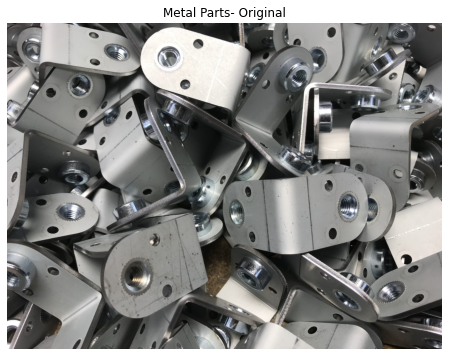

In [3]:
# Reading an image
img = cv2.imread('./data/Photos/metal_parts.jpg')
# 'img':: cv::Mat object

# Printing image using matplotlib
print_image(img, title="Metal Parts- Original")

## 6.1 Contour Detection after Canny Edge Detection

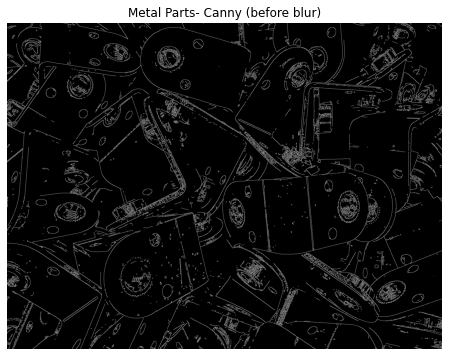

In [43]:
# First we, try out the edge detection algorithm on this (without Blurring):

# first, we grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# canny edge detection on the grayscaled image
canny_edge_img = cv2.Canny(gray_img, 125, 175)

# Printing image using matplotlib
print_image(canny_edge_img, title="Metal Parts- Canny (before blur)")

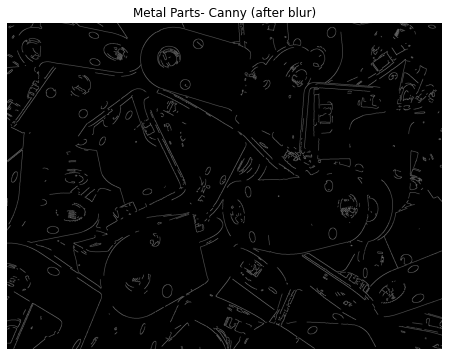

In [40]:
# First we, try out the edge detection algorithm on this (with Blurring):

# first, we grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply, Gaussian Blur
gray_blur_img = cv2.GaussianBlur(gray_img, (5,5), cv2.BORDER_DEFAULT)

# canny edge detection on the grayscaled, blurred image
canny_edge_img = cv2.Canny(gray_blur_img, 125, 175)

# Printing image using matplotlib
print_image(canny_edge_img, title="Metal Parts- Canny (after blur)")

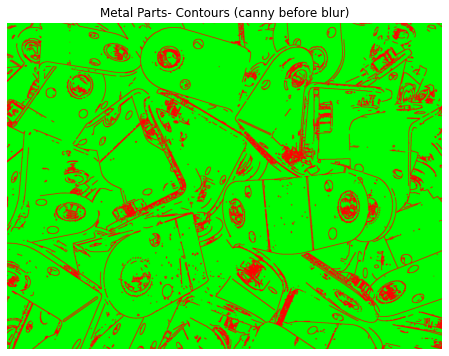

In [44]:
# we find the contours from the canny_edge image (without blur) 
# and show them on a blank green background in red color

# we make the blank background, of the same size as the original image
blankg_img = np.zeros(img.shape, dtype='uint8')
blankg_img[:] = (0,255,0)

# find the contours form the canny_edge image (without blur)
# `cv2.findContours` is used to detect the contours

contours, hierarchy = cv2.findContours(canny_edge_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# `contours`: a list that contains the co-ordinates of the detected objects
# `heirarchy`: keeps track of the object whose contours are being detected (because in an image there might be more than one objects hence it is necessary to keep track of the relationship between the contours and the object)
# `cv2.RETR_LIST`: contour retrieval method specifies how to establish a relationship between the contours and the objects
# `cv2.CHAIN_APPROX_SIMPLE`: contour approximation method is used to specify how to store the co-ordinates of the objects. It is used to specify which co-ordinates to store and which to ignore.

# drawing the cotours onto the blank image
contour_img = cv2.drawContours(blankg_img, contours=contours, contourIdx=-1, color=(0,0,255), thickness=2)
# contourIdx=-1 : draw all the contours

# Printing image using matplotlib
print_image(contour_img, title="Metal Parts- Contours (canny before blur)")

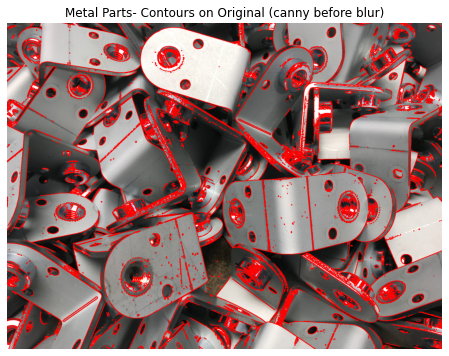

In [46]:
# we can also try plotting the contours onto the original image
contour_orig_img = cv2.drawContours(img, contours=contours, contourIdx=-1, color=(0,0,255), thickness=2)

# Printing image using matplotlib
print_image(contour_orig_img, title="Metal Parts- Contours on Original (canny before blur)")

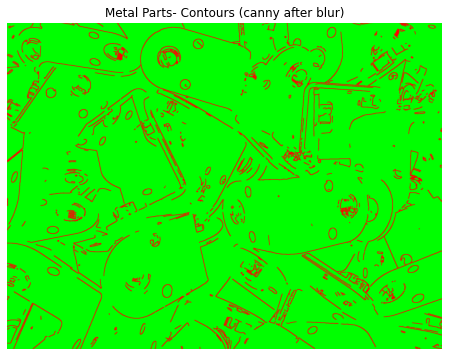

In [41]:
# we find the contours from the canny_edge image (with blur) 
# and show them on a blank green background in red color

# we make the blank background, of the same size as the original image
blankg_img = np.zeros(img.shape, dtype='uint8')
blankg_img[:] = (0,255,0)

# find the contours form the canny_edge image (with blur)
# `cv2.findContours` is used to detect the contours

contours, hierarchy = cv2.findContours(canny_edge_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# `contours`: a list that contains the co-ordinates of the detected objects
# `heirarchy`: keeps track of the object whose contours are being detected (because in an image there might be more than one objects hence it is necessary to keep track of the relationship between the contours and the object)
# `cv2.RETR_LIST`: contour retrieval method specifies how to establish a relationship between the contours and the objects
# `cv2.CHAIN_APPROX_SIMPLE`: contour approximation method is used to specify how to store the co-ordinates of the objects. It is used to specify which co-ordinates to store and which to ignore.

# drawing the cotours onto the blank image
contour_img = cv2.drawContours(blankg_img, contours=contours, contourIdx=-1, color=(0,0,255), thickness=2)
# contourIdx=-1 : draw all the contours

# Printing image using matplotlib
print_image(contour_img, title="Metal Parts- Contours (canny after blur)")

## 6.2 Contour Detection after Thresholding

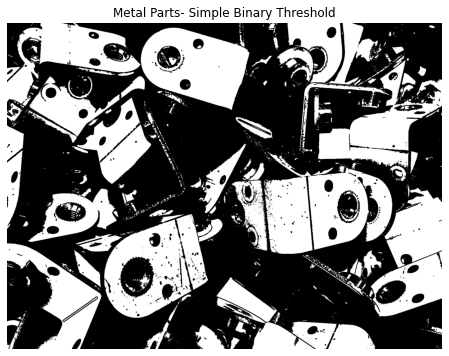

In [48]:
# First we, try out binary thresholding on this, before finding the contours:

# first, we grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# binary thresholding the grayscaled image using `cv2.threshold` method
ret, threshold_img = cv2.threshold(gray_img, 125, 255, cv2.THRESH_BINARY)
# we do simple thresholding by using `cv2.THRESH_BINARY`: for every pixel, the same threshold value is applied; if the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value
# in this case, we set every pixel with intensity < 125 to 0


# Printing image using matplotlib
print_image(threshold_img, title="Metal Parts- Simple Binary Threshold")

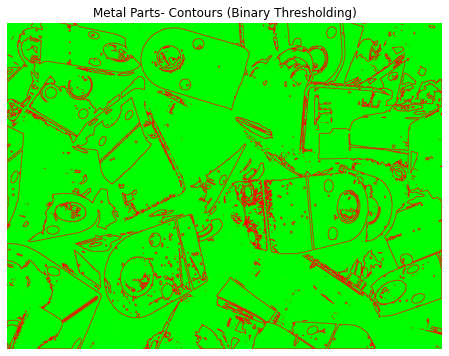

In [49]:
# we find the contours from the binary threshold image
# and show them on a blank green background in red color

# we make the blank background, of the same size as the original image
blankg_img = np.zeros(img.shape, dtype='uint8')
blankg_img[:] = (0,255,0)

# find the contours form the binary threshold image
# `cv2.findContours` is used to detect the contours

contours, hierarchy = cv2.findContours(threshold_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# `contours`: a list that contains the co-ordinates of the detected objects
# `heirarchy`: keeps track of the object whose contours are being detected (because in an image there might be more than one objects hence it is necessary to keep track of the relationship between the contours and the object)
# `cv2.RETR_LIST`: contour retrieval method specifies how to establish a relationship between the contours and the objects
# `cv2.CHAIN_APPROX_SIMPLE`: contour approximation method is used to specify how to store the co-ordinates of the objects. It is used to specify which co-ordinates to store and which to ignore.

# drawing the cotours onto the blank image
contour_img = cv2.drawContours(blankg_img, contours=contours, contourIdx=-1, color=(0,0,255), thickness=2)
# contourIdx=-1 : draw all the contours

# Printing image using matplotlib
print_image(contour_img, title="Metal Parts- Contours (Binary Thresholding)")